<a href="https://colab.research.google.com/github/UDEA-Esp-Analitica-y-Ciencia-de-Datos/EACD-04-MACHINE-LEARNING-1/blob/master/01-Introduccion_al_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Recuerda que una vez abierto, Da clic en "Copiar en Drive", de lo contrario no podras alamancenar tu progreso**

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

# Introducción al Machine Learning

In [1]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/UDEA-Esp-Analitica-y-Ciencia-de-Datos/EACD-04-MACHINE-LEARNING-1/master/init.py
import init; init.init(force_download=False); 

In [1]:
from IPython.display import Image

## <font color='blue'>Definición</font>

El aprendizaje de máquina  (En inglés: Machine Learning (ML)) es una rama de la inteligencia artifical enfocada al estudio de sistemas que pueden "aprender"" a partir de datos. De acuerdo con [1], ML son un conjunto de métodos que pueden detectar automáticamente patrones en un conjunto de datos, aprenderlos y luego usarlos para predicir datos futuros o realizar otro tipo de decisiones bajo incertidumbre.

#### Ejemplos de aplicaciones de ML:
<ul>
<li>Reconocimiento de Caracteres escritos a mano </li>
</ul>

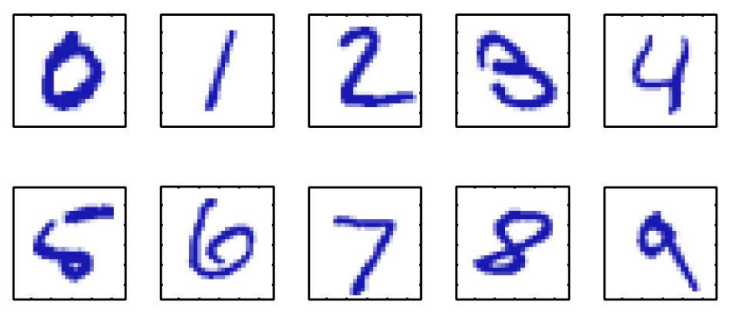

In [5]:
Image("local/imgs/HR.png", width = 400, height = 200)

<li>Reconocimiento de Rostros</li>

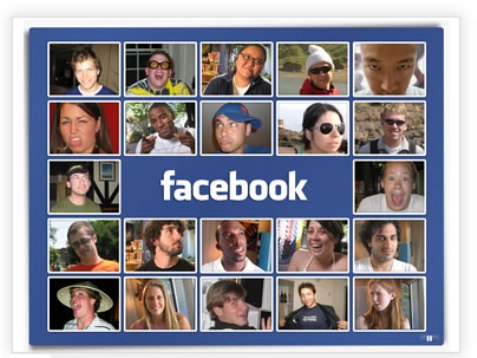

In [3]:
Image("local/imgs/facebook-photo.jpeg")

<li>Reconocimiento de objetos</li>

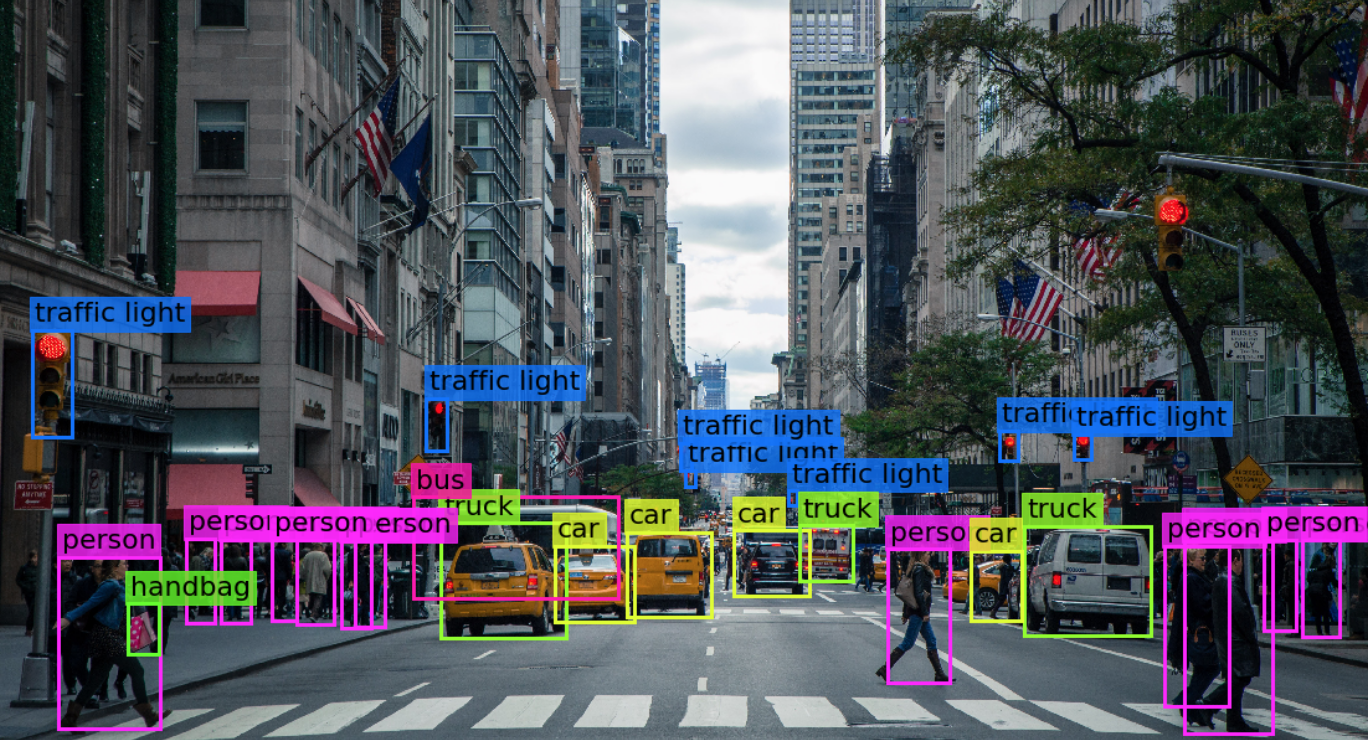

In [6]:
Image("local/imgs/Computer-Vision1.png")

<li>Reconocimiento de voz</li>

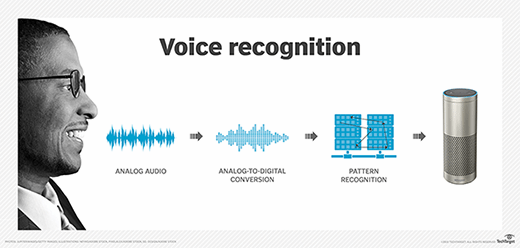

In [8]:
Image("local/imgs/voice_recognition_mobile.png")

<li>Traducción</li>

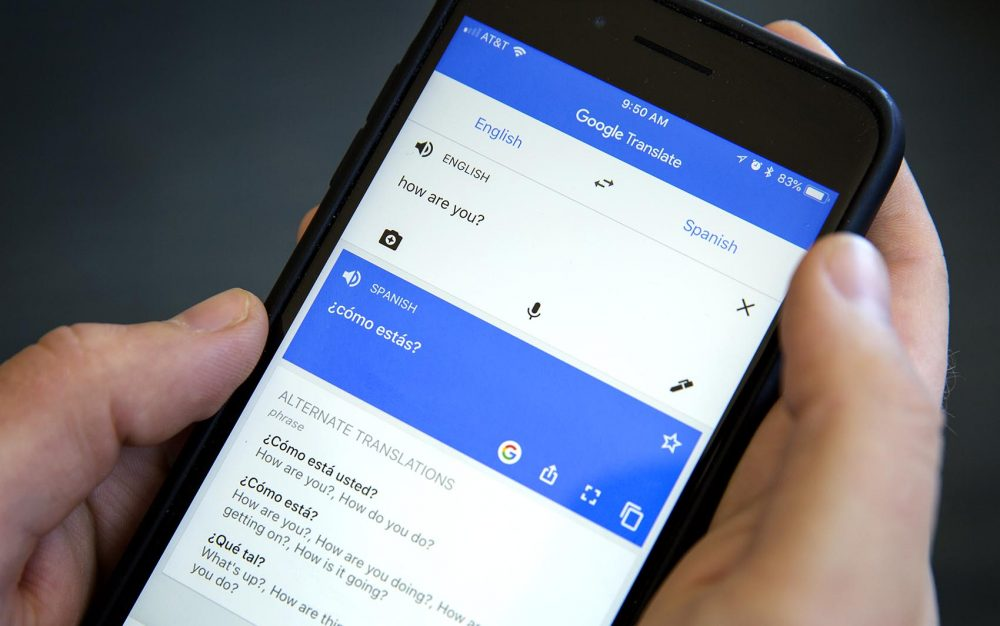

In [11]:
Image("local/imgs/translate.jpg", width = 600, height = 300)

y muchas otras...

# Modelos a partir de datos

### Aproximación mecanicista:

Cuando se conocen los principios físicos o las leyes que rigen la interacción entre las variables del problema y que producen la salida objetivo de predicción.

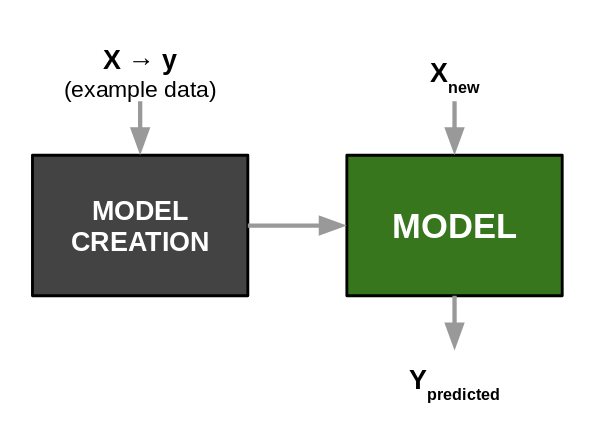

In [11]:
Image("local/imgs/Model.png", width = 400, height = 200)

### Aproximación en Machine Learning:

Cuando se desconocen las leyes que rigen las relaciones entre las variables y se tratan de descubir a patir de los datos mismos, usando un enfoque correlacional.

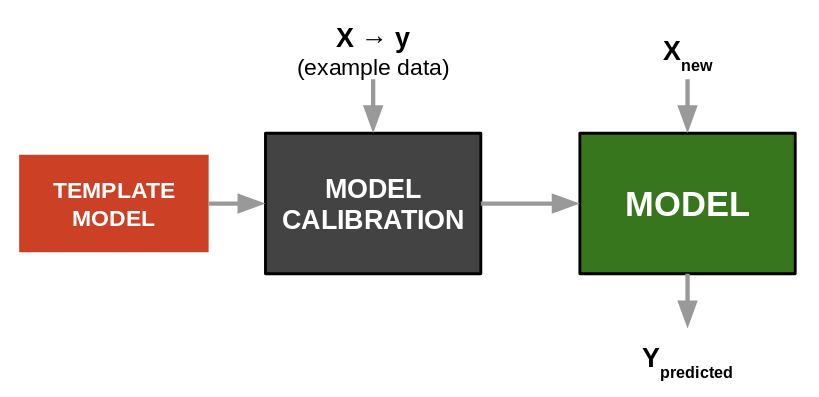

In [10]:
Image("local/imgs/Model2.png", width = 600, height = 300)

Las plantillas (templates) son entonces los diferentes modelos y algoritmos de machine learning que encontramos en la literatura y en las librerías y frameworks para el entrenamiento de sistemas basados en ML.

### <font color='red'>La calibración dependerá de la muestra de datos con que se cuente!</font> 

In [2]:
from scipy import stats
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

d1 = stats.norm(loc=10,scale=2)
d2 = stats.norm(loc=17,scale=3)

frontera óptima en 13.15


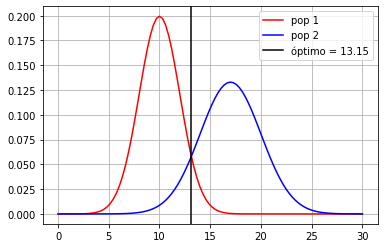

In [3]:
x = np.linspace(5,25,1000)
minx = x[np.argmin(np.abs(d1.pdf(x)-d2.pdf(x)))]

print ("frontera óptima en %.2f"%minx)

x = np.linspace(0,30,100)
plt.plot(x, d1.pdf(x), color="red", label="pop 1")
plt.plot(x, d2.pdf(x), color="blue", label="pop 2")
plt.axvline(minx, color="black", label=u"óptimo = %.2f"%minx)
plt.grid()
plt.legend();

#### Caso real: Tenemos una muestra de los datos

$\rightarrow$ ¿Cómo determinamos donde poner la frontera?

$\rightarrow$ ¿Qué frontera quisiéramos obtener?

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
def show_1D_dataset_samples(n, n_datasets=10, dot_alpha=.5, line_alpha=.5, figsize=(20,5)):
    fig, axs = plt.subplots(1, 2,figsize=figsize)
    for i in range(n_datasets):

        m1 = d1.rvs(n)
        m2 = d2.rvs(n)
        X = np.append(m1, m2).reshape(-1,1)
        y = np.r_[[0]*len(m1)+[1]*len(m2)]
        
        estimator = DecisionTreeClassifier(max_depth=1)
        estimator.fit(X,y)
        Xr = np.linspace(5, 30, 100).reshape(-1,1)
        yr = estimator.predict(Xr)
            
        axs[0].plot(Xr[yr==0], [i]*np.sum(yr==0), color="red", alpha=line_alpha, lw=4)
        axs[0].plot(Xr[yr==1], [i]*np.sum(yr==1), color="blue", alpha=line_alpha, lw=4)
        axs[0].scatter(m1, [i+.1]*len(m1), color="red", alpha=dot_alpha, s=100)
        axs[0].scatter(m2, [i+.1]*len(m2), color="blue", alpha=dot_alpha, s=100)
        #-----------------------------------------
        estimator = GaussianNB()
        estimator.fit(X,y)
        yr = estimator.predict(Xr)     
        axs[1].plot(Xr[yr==0], [i]*np.sum(yr==0), color="red", alpha=line_alpha, lw=4)
        axs[1].plot(Xr[yr==1], [i]*np.sum(yr==1), color="blue", alpha=line_alpha, lw=4)
        axs[1].scatter(m1, [i+.1]*len(m1), color="red", alpha=dot_alpha, s=100)
        axs[1].scatter(m2, [i+.1]*len(m2), color="blue", alpha=dot_alpha, s=100) 
    axs[1].axis("off")
    axs[1].set_title('Plantilla de modelo 2')
    axs[0].axis("off")
    axs[0].set_title('Plantilla de modelo 1')

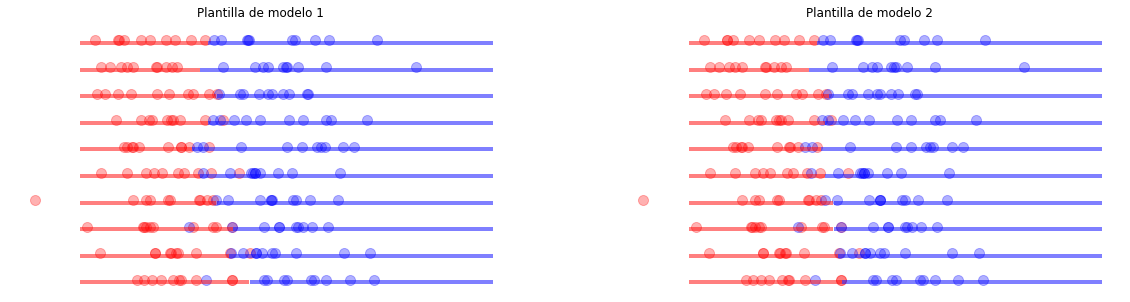

In [5]:
show_1D_dataset_samples(10, dot_alpha=.3)

#### Algunas conclusiones:

- La frontera cambiará de forma dependiendo de la "plantilla" de modelo que se use. 
- La frontera cambiará de ubicación si cambia la muestra, entre más datos se tengan, menos variación se obtendrá.
- En problemas reales el número de características aumenta y los problemas no se pueden visualizar directamente, por lo que se deben usar metdologías que permitan saber si el modelo seleccionado y el conjunto de datos, son suficientes.

## <font color='blue'> ¿Qué implica resolver un problema de ML? </font>

**Primero** realizamos experimentos (ciencia), **después** desarrollamos productos (ingeniería)

Dos roles $\rightarrow$ dos flujos de trabajo:

- **diseñador** de algoritmos de ML $\rightarrow$ se enfoca en cómo se **genera un modelo**.
- **usuario** de algoritmos de ML $\rightarrow$ se enfoca en **calibrar modelos** respecto a unos datos concretos.

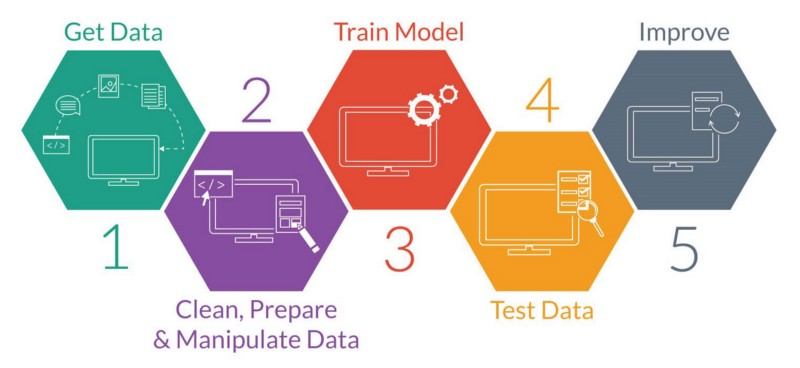

In [31]:
Image("local/imgs/ML_user.jpeg", width = 600)

Cuando el problema que queremos resolver no es estándar, o la solución que nos proporcionan los modelos convencionales no satisface los requerimientos del problema, debemos entrar en el rol de **diseñador** y proponer los ajustes necesarios o incluso un nuevo modelo para el problema de interés.

## Tipos de Aprendizaje de Máquina

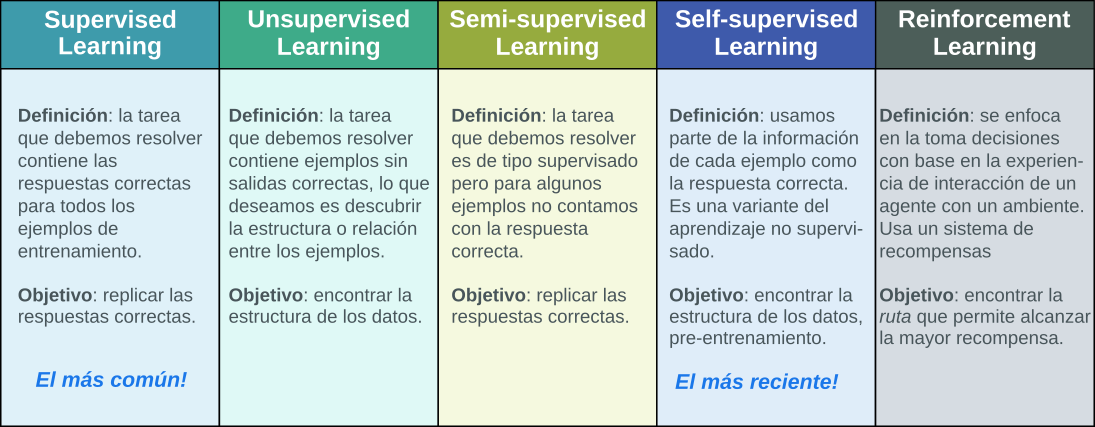

In [30]:
Image("local/imgs/ML_types.png", width = 800)

### Formalmente...

### Aprendizaje predictivo o supervisado (Supervised Learning)

En el cual el objetivo es aprender un mapeo a partir de entradas ${\bf{x}} = [x_1,x_2,\cdots,x_d]$ a salidas $t$, dado un conjunto de pares entrada-salida etiquetados $\mathcal{D} = \left\lbrace  \left( {\bf{x}}_i, t_i \right) \right\rbrace _{i=1} ^{N}$. En este caso $\mathcal{D}$ se conoce como el <b>conjunto de entrenamiento</b> y $N$ es el número de muestras de entrenamiento.

En una forma simple, cada muestra de entrenamiento ${\bf{x}}_i$ es un vector de números $d$-dimensional que representa variables o medidas del sistema o fenómeno que se desea modelar y que en el contexto del aprendizaje de máquinas es común llamarlas <b>características</b> (en inglés <b>features</b>).

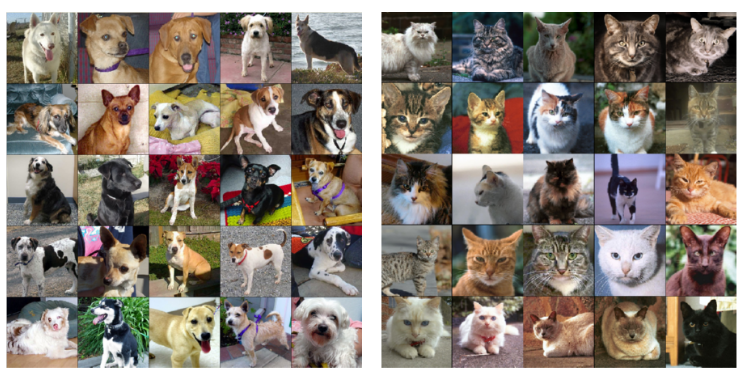

In [29]:
Image("local/imgs/Supervised.png", width = 600)

### Descriptivo o no supervisado (Unsupervised Learning)

En este caso unicamente se cuenta con un conjunto $\mathcal{D} = \left\lbrace  \left( {\bf{x}}_i \right) \right\rbrace _{i=1} ^{N}$; y el objetivo es encontrar "patrones interesantes" en los datos. Algunas veces se le llama <b>Descubrimiento de conocimiento</b>

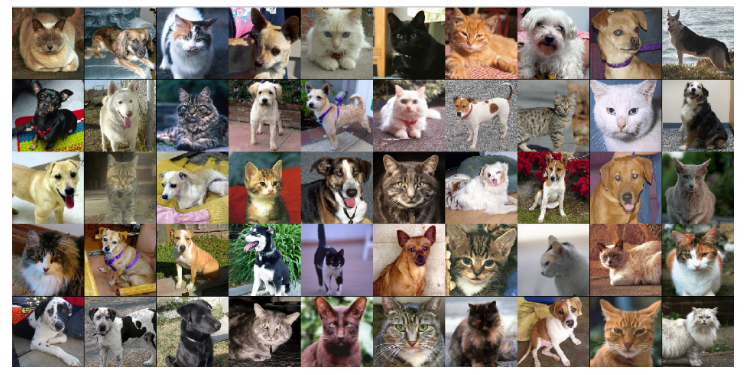

In [28]:
Image("local/imgs/Unsupervised.png", width = 600)

El aprendizaje se puede realizar en muchos tipos de objetos:

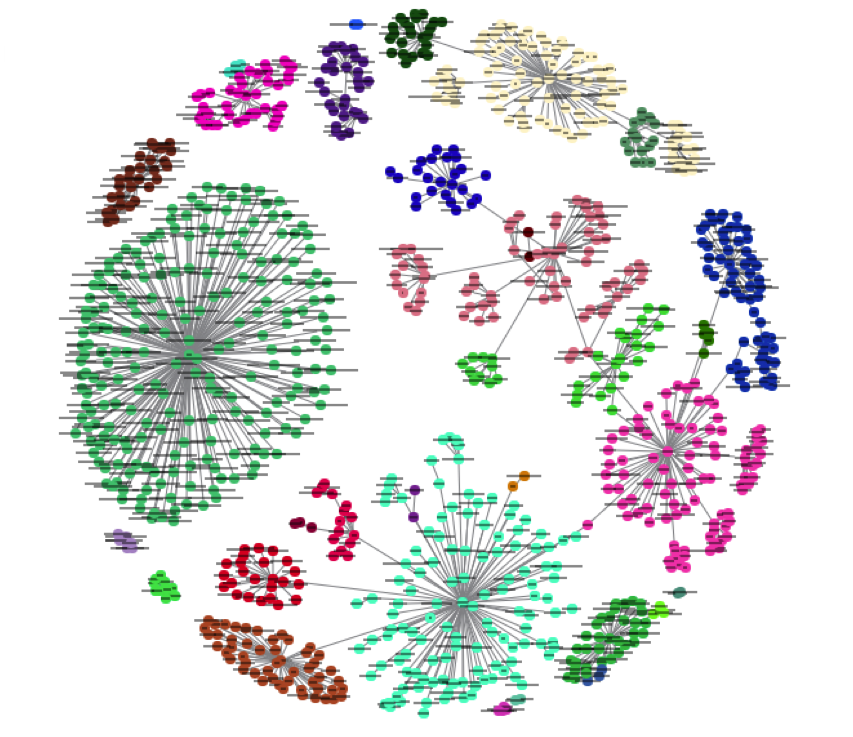

In [18]:
Image("local/imgs/Clustering.png", width = 600, height = 300)

----------------------------------------------------------------------------------------------------------------------------------------------

# Tipos de problemas supervisados

En general ${\bf{x}}_i$ puede representar un objeto complejo como una imagen, un video, una palabra, una frase, un mensaje de correo electrónico, un cliente de un crédito bancario, una serie de tiempo, una cadena de ADN, una molécula, un grafo, etc. En el aprendizaje supervisado, si la variable de salida $t_i$ toma valores discretos (es categórica), el problema de aprendizaje se conoce como <b>Clasificación</b>. 

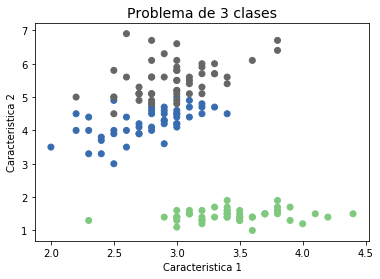

In [6]:
from sklearn import datasets
iris = datasets.load_iris()
X, y = iris.data, iris.target
import matplotlib.pyplot as plt
plt.title('Problema de 3 clases', fontsize=14)
plt.xlabel('Caracteristica 1')
plt.ylabel('Caracteristica 2')
plt.scatter(X[:,1], X[:,2],c=y,cmap="Accent")
plt.show()

Si por el contrario $y_i$ toma valores reales, el problema se conoce como <b>Regresión</b>.

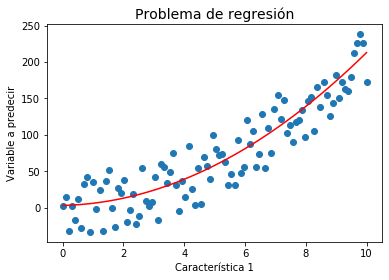

In [7]:
a = np.array([1, 2, 3])
x = np.linspace(0,10,100);
y1 = np.zeros(100)
y2 = np.zeros(100)
for i in range(len(x)):
    b = np.array([x[i],x[i]**2,1])
    y1[i] = sum(a*b +  30*(np.random.rand() - 0.5))
    y2[i] = sum(a*b)
plt.title(u'Problema de regresión', fontsize=14)
plt.xlabel(u'Característica 1')
plt.ylabel(u'Variable a predecir')
plt.scatter(x, y1)
plt.plot(x,y2,'r')
plt.show()

## Retos que deben ser enfrentados dentro del aprendizaje de máquina

Cuando nos enfrentamos a un problema de aprendizaje vamos a encontrarnos con una serie de situaciones que harán la tarea un problema no trivial.

<b>Clasificación</b>
<li>Las clases son colecciones de objetos no necesariamente idénticos, entonces cada clase queda definida por las muestras con las que se cuente para entrenar el sistema </li>

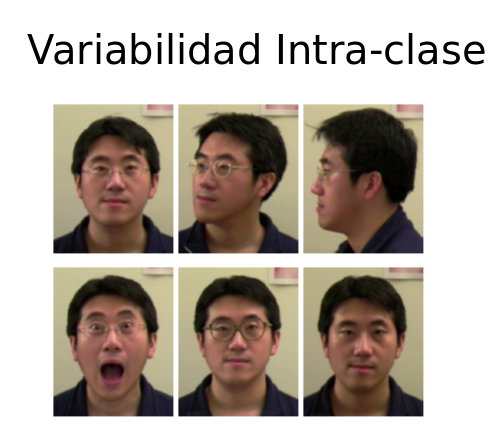

In [27]:
Image("local/imgs/ICVariability.png", width = 500)

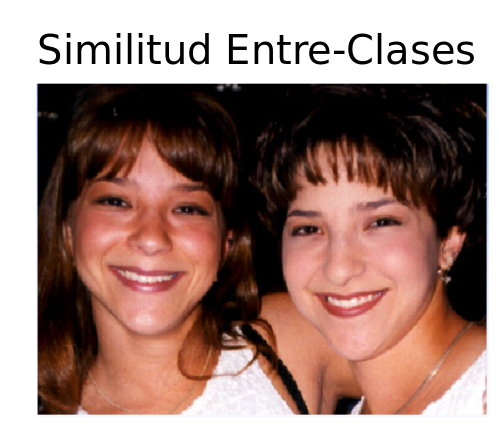

In [26]:
Image("local/imgs/ICSimilarity.png", width = 450)

----------------------------------------------------------------------------------------------------------------------------------------------

## Diseño de un modelo de ML

Cuando nos enfrentamos al problema de aprendizaje de máquina debemos responder a tres preguntas fundamentales:

* Cuál es el <b>modelo</b> que vamos a usar teniendo en cuenta el problema a resolver, es decir la estructura que tiene el conjunto de datos. Es importante tener en cuenta que todo modelo tiene parámetros que se deben ajustar para que pueda adaptarse ('aprender'), al problema particular que deseamos abordar.

$$ f({\bf{x}}) = {\bf{w}}^T{\bf{x}}$$


* Cuál es el <b>criterio</b> de ajuste del modelo que vamos a usar. Es decir, determinar qué es lo que queremos que haga el modelo con respecto al conjunto de muestras de entrenamiento y expresarlo a través de una función matemática. Típicamente se llama función de costo o de pérdida.

$$\min_{{\bf{w}}} \sum_{i=1}^N \left(y_i - f({\bf{x}}_i) \right)^2$$

* Cuál es y cómo funciona el <b>algoritmo</b> que encuentra los parámetros del modelo de acuerdo al criterio escogido. En la mayoría de los casos la ejecución del criterio de entrenamiento implica un procedimiento de maximización (o minimización) de la función de costo. Por consiguiente en esta etapa necesitamos aplicar un algoritmo que pueda solucionar el problema de optimización.

$$\bf{\text{Gradiente descendente}}$$



Como todo procedimiento de modelado, el aprendizaje de máquina debe pasar por etapas de verificación y validación que permitan establecer el correcto funcionamiento del modelo propuesto y cuantificar su desempeño en términos objetivos.

### Niveles de abstracción:

* **Alto nivel**: Selecciono un modelo (plantilla) que encaja en el problema que quiero resolver y uso una librería que tiene definido ya un criterio e implementado un algoritmo de entrenamiento. Me enfoco en ajustar el modelo a los datos y realizar el proceso de validación.
* **Nivel intermedio**: Selecciono un modelo pero quiero modificar la función de costo para el entrenamiento. Uso una librería de cálculo simbólico para la optimización de la nueva función.
* **Bajo nivel**: Selecciono el modelo el modelo y decido cambiar la función criterio y/o el algoritmo de optimización, o incluso hacer cambios en la formulación del modelo.

El último nivel es necesario sobre todo en casos en los que se abordan problemas avanzados en los que las soluciones predefinidas no son suficientes para alcanzar un solución satisfactoria.

#### Bibliografía